In [20]:
from lxml import etree
from urllib import request
import matplotlib.pyplot as plt
import time

In [21]:
def get_listitem(data):
    page = etree.HTML(data)
    return page.xpath("/html/body/ul/li")

def into_numbers(str_list):
    splitter = "："
    return [int(s.text.split(splitter)[1][:-1]) for s in str_list]

url = "https://www.gakujutsu.co.jp/text/isbn978-4-7806-0708-6/file/sushi1.php"
data = request.urlopen(url).read()

term = 60
interval = 5

price = []

for item in range(term // interval):
    data = request.urlopen(url).read()
    price.append(into_numbers(get_listitem(data)))
    time.sleep(interval)

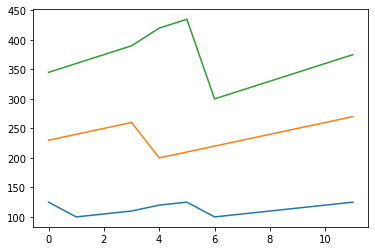

In [24]:
plt.plot(price)
plt.savefig("l6_graph.png")

In [39]:
from selenium import webdriver
from lxml import etree
from urllib import request
import chromedriver_binary
import time


In [28]:
driver = webdriver.Chrome()
url = "https://www.rakuten-sec.co.jp/web/market/data/exchange_top.html"

driver.get(url)
time.sleep(5)
data = driver.page_source
page = etree.HTML(data)
ps = page.xpath('//*[@id="tFx"]/table/tbody/tr[1]/td[1]')
for item in ps:
    print(item.text)

108.98


In [62]:
driver = webdriver.Chrome()
url = "https://www.xe.com/ja/currencyconverter/convert/?Amount=1&From=INR&To=JPY"

record = []

for i in range(4):
    driver.get(url)
    time.sleep(10)
    data = driver.page_source
    page = etree.HTML(data)
    ps = page.xpath('//*[@id="__next"]/div[2]/div[2]/section/div[2]/div/main/form/div[2]/div[1]/p[2]/span')
    for item in ps:
        print(item.text)
        record.append(float(item.text.strip()))
    time.sleep(20)

.4914807
.4914807
.4912837
.4912837


In [63]:
print(record)

[0.4914807, 0.4914807, 0.4912837, 0.4912837]


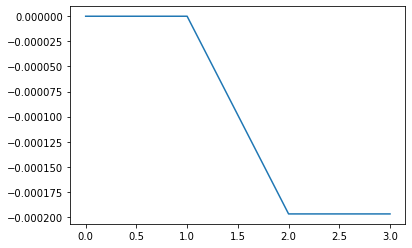

In [66]:
import numpy as np

record = np.asarray(record, np.float32)
plt.plot(record - record[0])
plt.savefig("l6_graph_ex.png")